In [7]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from model import create_model
import numpy as np
import operator
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
img_path = "../../../dataset/split_data/test/c2/img_32640.jpg"
class_labels = ['safe_driving', 'texting_right', 'talking_on_phone_right', 'texting_left', 'talking_on_phone_left',
                'operating_radio', 'drinking', 'reaching_behind', 'doing_hair_makeup', 'talking_to_passanger']

In [3]:
model = create_model()
model.load_weights("_weights.h5")
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
target_size=(150,150)

# prepare image for classification using keras utility functions
image = load_img(img_path, target_size=target_size)

image_arr = img_to_array(image) # convert from PIL Image to NumPy array
# the dimensions of image should now be (150, 150, 3)

# to be able to pass it through the network and use batches, we want it with shape (1, 224, 224, 3)
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

(1, 150, 150, 3)


In [5]:
data_datagen = ImageDataGenerator(
            # rotation_range=10, # range (0-180) within which to randomly rotate pictures
            # width_shift_range=0.2, # as fraction of width, range within to which randomly translate pictures
            # height_shift_range=0.2, # same as above, but with height
            rescale=1./255, # RBG coefficient values 0-255 are too hight to process. instead, represent them as values 0-1
            # shear_range=0.2, # random shearing transformations
            # zoom_range=0.1, # randomly zooming inside pictures
            # horizontal_flip=False,
            fill_mode='nearest') # strategy for filling in newly created pixels, which can appear after a rotation or a width/height shift

# this is a similar generator, for test data
data_generator = data_datagen.flow(image_arr)

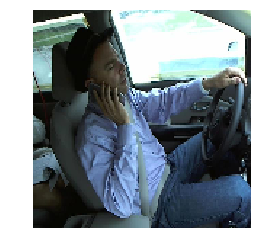

1. talking_on_phone_right: 2.013272%
2. doing_hair_makeup: 0.000004%
3. drinking: 0.000002%
4. reaching_behind: 0.000000%
5. safe_driving: 0.000000%


In [10]:
# classify given an image
predictions = model.predict_generator(data_generator)

# get human-readable labels of the preditions, as well as the corresponding probability
decoded_predictions = dict(zip(class_labels, predictions[0]))

# sort dictionary by value
decoded_predictions = sorted(decoded_predictions.items(), key=operator.itemgetter(1), reverse=True)

# print image
plt.imshow(image)
plt.axis('off')
plt.show()

count = 1
for key, value in decoded_predictions[:5]:
    print("{}. {}: {:8f}%".format(count, key, value*100))
    count+=1